# 1. Importing and Browsing Data 

Performed by: Kendall and Andrew

In [1]:
cd data

C:\Users\Jackson\Documents\flatiron\project1\dsc-phase-1-project-v3\data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
aviation = pd.read_csv('Aviation_Data.csv')

C:\Users\Jackson\anaconda\anaconda-this one\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 2. Cleaning Data

Performed by: Kendall and Andrew

1. Drop duplicates based on event ID: 1390 entries.
2. Standardized weather conditions (upper/lower casing)
3. Standardized make names (upper/lower casing)
4. Drop null values for event date: 1 entry.
4. Created Year column.

In [5]:
#dropping dupliates
duplicates = aviation[aviation.duplicated()]
print(len(duplicates))
duplicates.head(30)
aviation = aviation.drop_duplicates(subset='Event.Id')

1390


In [6]:
#dropping event ID N/A
aviation.dropna(subset=['Event.Id'], inplace=True)

In [7]:
#standardizing weather conditions
aviation['Weather.Condition'] = aviation['Weather.Condition'].replace('Unk', 'UNK')

In [8]:
aviation['Engine.Type'] = aviation['Engine.Type'].replace('NONE', 'None')

In [9]:
#standardizing make names
aviation['Make'] = aviation['Make'].apply(lambda x: str(x).title())
aviation['Make'] = aviation['Make'].replace('PIPER', 'Piper')
aviation['Make'] = aviation['Make'].replace('CESSNA', 'Cessna')
aviation['Make'] = aviation['Make'].replace('BEECH', 'Beech')
aviation['Make'] = aviation['Make'].replace('BELL', 'Bell')

In [10]:
aviation['Make'].value_counts()

Cessna               26839
Piper                14744
Beech                 5332
Bell                  2706
Boeing                2652
                     ...  
Randy Tredo              1
Conner                   1
Hook                     1
Boyle Black Eagle        1
Renninger                1
Name: Make, Length: 7553, dtype: int64

In [11]:
#dropping nans for event date
aviation.dropna(subset=['Event.Date'], inplace=True)

In [12]:
#creating year column
aviation['Year'] = aviation['Event.Date'].astype(str).str[:4]

# 3A. ENGINE COUNT & TYPE - Trend Exploration

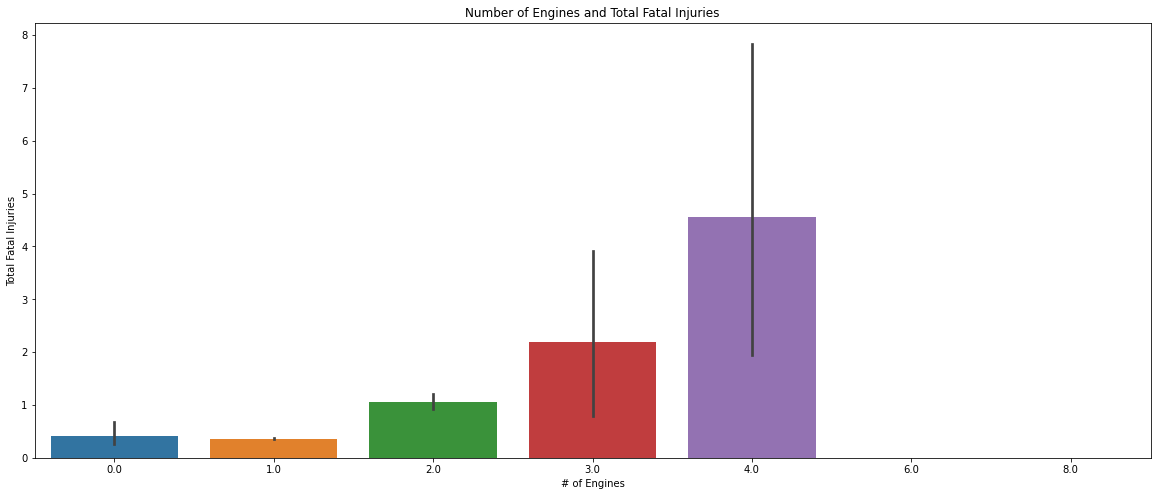

In [13]:
#plot of engine count and fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Number.of.Engines'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Number of Engines and Total Fatal Injuries')
ax.set_xlabel('# of Engines')
ax.set_ylabel('Total Fatal Injuries');

In [14]:
#sum of injuries for engine count
engine_count = aviation.groupby('Number.of.Engines').sum()
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,402.0,443.0,476.0,3018.0
1.0,21627.0,13818.0,17592.0,71816.0
2.0,10048.0,3385.0,4416.0,183081.0
3.0,861.0,316.0,1141.0,46148.0
4.0,1651.0,231.0,506.0,37622.0
6.0,0.0,0.0,0.0,0.0
8.0,0.0,21.0,3.0,11.0


In [15]:
#means of injueries for engine count
aviation.groupby('Number.of.Engines').mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,0.420502,0.436884,0.485714,2.768807
1.0,0.359444,0.232056,0.291925,1.109916
2.0,1.052918,0.361839,0.474227,17.838936
3.0,2.190840,0.784119,2.881313,104.171558
4.0,4.560773,0.634615,1.390110,93.354839
6.0,0.000000,0.000000,0.000000,0.000000
8.0,0.000000,7.000000,1.000000,3.666667


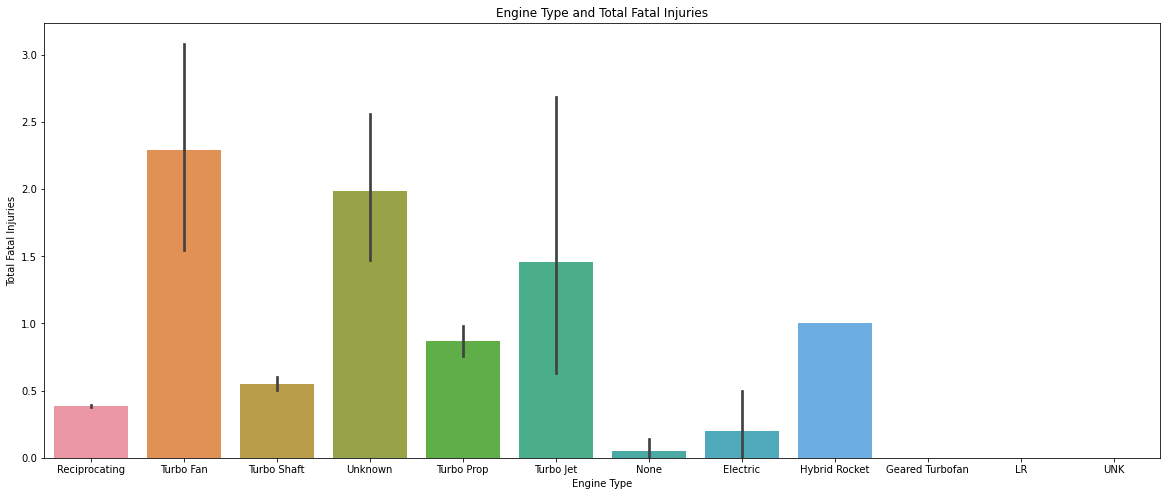

In [16]:
#plot of engine type and total fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Engine.Type'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Engine Type and Total Fatal Injuries')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Fatal Injuries');

In [17]:
engine_count['Total Passengers'] = engine_count['Total.Fatal.Injuries'] + engine_count['Total.Serious.Injuries'] + engine_count['Total.Minor.Injuries'] + engine_count['Total.Uninjured']

# 3B: ENGINE COUNT - Ratio of Uninjured to All Passengers 

Performed by: Kendall 

In [18]:
engine_count['Ratio Uninjured'] = engine_count['Total.Uninjured'] / engine_count['Total Passengers']
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Number.of.Engines,,,,,,
0.0,402.0,443.0,476.0,3018.0,4339.0,0.695552
1.0,21627.0,13818.0,17592.0,71816.0,124853.0,0.575204
2.0,10048.0,3385.0,4416.0,183081.0,200930.0,0.911168
3.0,861.0,316.0,1141.0,46148.0,48466.0,0.952173
4.0,1651.0,231.0,506.0,37622.0,40010.0,0.940315
6.0,0.0,0.0,0.0,0.0,0.0,NaN
8.0,0.0,21.0,3.0,11.0,35.0,0.314286


In [19]:
engine_count['Ratio Uninjured'] = engine_count['Ratio Uninjured']*100 

<ipython-input-20-c8a47c756f99>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


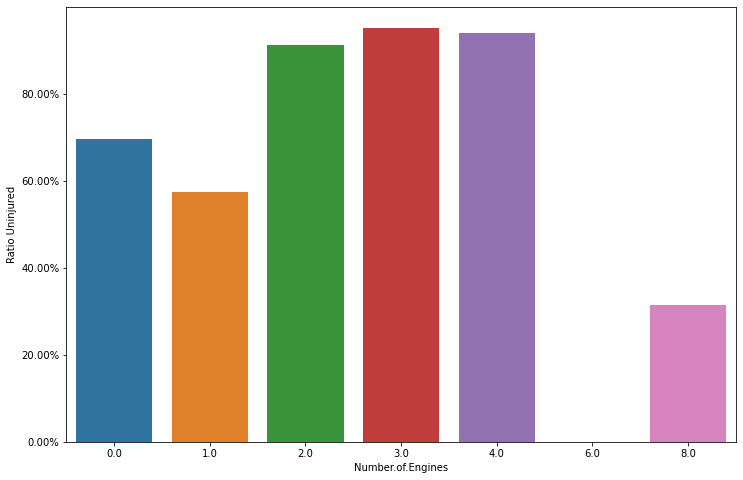

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=engine_count.index, y=engine_count['Ratio Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

*94-95% of passengers in accidents of planes with 3 and 4 engines were uninjured.

# 3C: ENGINE TYPE - Ratio of Uninjured to All Passengers 


Performed by: Kendall

In [21]:
#sums of engine types and total injuries
aviation.groupby('Engine.Type').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,24.0,2.0,1.0,0.0,7.0
Geared Turbofan,22.0,0.0,0.0,0.0,121.0
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0
LR,16.0,0.0,21.0,3.0,11.0
None,11.0,1.0,12.0,8.0,92.0
Reciprocating,74452.0,23126.0,13366.0,17157.0,72943.0
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0


In [22]:
#means of engine type and number of injuries
aviation.groupby('Engine.Type').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,3.000000,0.200000,0.100000,0.000000,0.700000
Geared Turbofan,2.000000,0.000000,0.000000,0.000000,10.083333
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000
None,0.647059,0.047619,0.571429,0.380952,4.380952
Reciprocating,1.088798,0.383732,0.224563,0.285213,1.128520
Turbo Fan,2.337708,2.294393,0.908726,1.675524,83.688765
Turbo Jet,2.139053,1.460069,0.406957,0.640212,50.083205
Turbo Prop,1.572875,0.869936,0.248151,0.323111,4.851537


In [23]:
engine_types = aviation.groupby('Engine.Type').sum()

In [24]:
#creating a total passengers column and then a ratio of total uninjured to total passengers
engine_types['Total Passengers'] = engine_types['Total.Fatal.Injuries'] + engine_types['Total.Serious.Injuries'] + engine_types['Total.Minor.Injuries'] + engine_types['Total.Uninjured']
engine_types['Ratio Uninjured'] = engine_types['Total.Uninjured'] / engine_types['Total Passengers']

In [25]:
engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Engine.Type,,,,,,,
Electric,24.0,2.0,1.0,0.0,7.0,10.0,0.700000
Geared Turbofan,22.0,0.0,0.0,0.0,121.0,121.0,1.000000
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0,2.0,0.000000
LR,16.0,0.0,21.0,3.0,11.0,35.0,0.314286
None,11.0,1.0,12.0,8.0,92.0,113.0,0.814159
Reciprocating,74452.0,23126.0,13366.0,17157.0,72943.0,126592.0,0.576205
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0,203919.0,0.953364
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0,33942.0,0.957634
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0,18840.0,0.787473


In [26]:
engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 

In [27]:
#making the column into a percentage format
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured'].map('{:.2%}'.format)

<ipython-input-28-48da2f0f6469>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


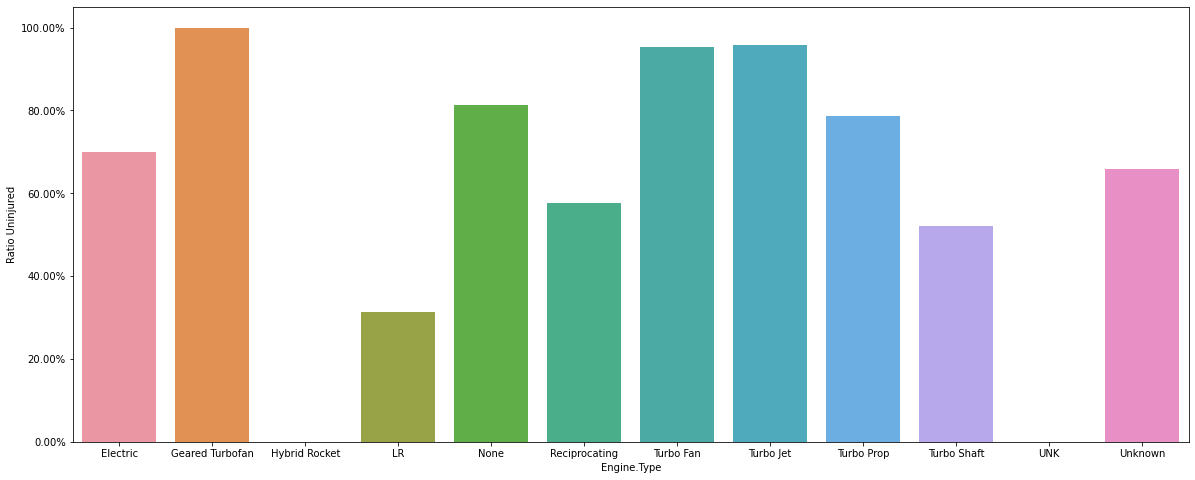

In [28]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=engine_types.index, y=engine_types['Ratio Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

*Over 95% of passengers on Turbo Fan and Turbo Jet planes are uninjured. 

# 4A. AIRCRAFT DAMAGE - Trend Exploration

Performed by: Kendall

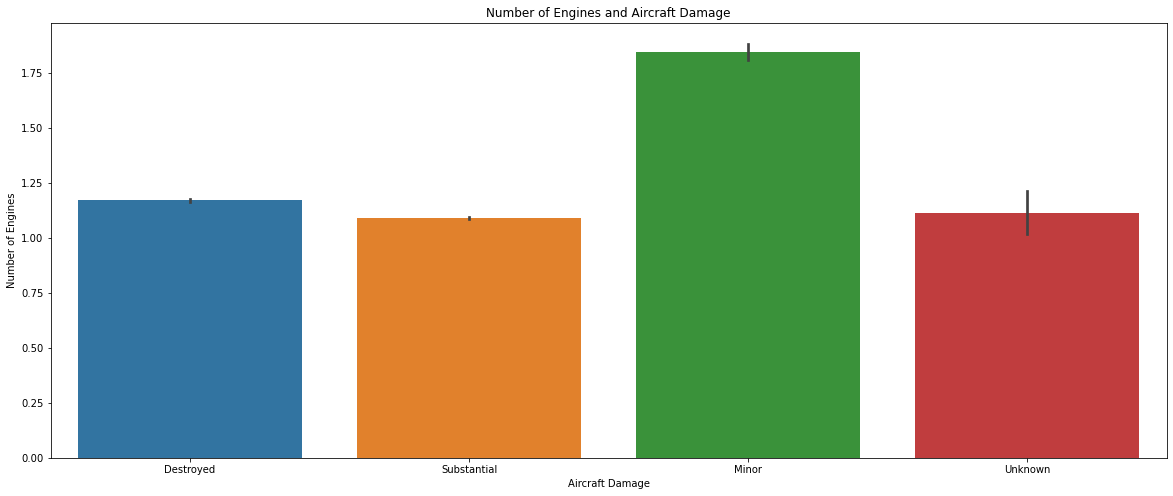

In [32]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Number.of.Engines'])

ax.set_title('Number of Engines and Aircraft Damage')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Number of Engines');

In [33]:
aviation.groupby('Aircraft.damage').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.damage,,,,,
Destroyed,19650.0,39670.0,6892.0,6015.0,8627.0
Minor,3918.0,278.0,526.0,1773.0,105383.0
Substantial,66512.0,7748.0,12369.0,17634.0,146266.0
Unknown,68.0,56.0,16.0,25.0,478.0


In [34]:
aviation.groupby('Aircraft.damage').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.damage,,,,,
Destroyed,1.170967,2.235685,0.427278,0.377755,0.543125
Minor,1.844633,0.121823,0.227607,0.773898,40.516340
Substantial,1.090307,0.143742,0.227937,0.319532,2.418459
Unknown,1.114754,0.470588,0.134454,0.210084,4.016807


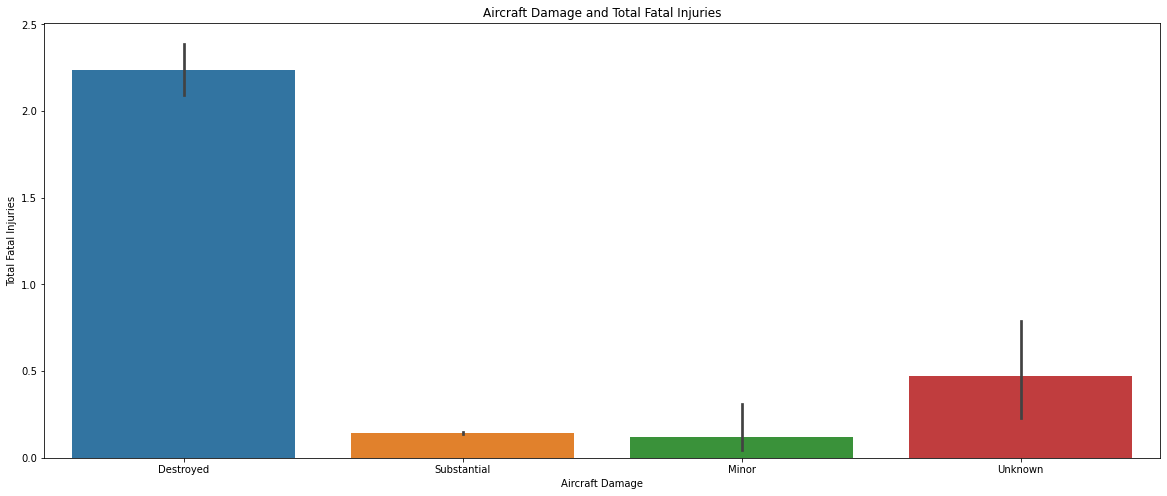

In [35]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Aircraft Damage and Total Fatal Injuries')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Total Fatal Injuries');

In [36]:
aviation.groupby(['Aircraft.damage','Number.of.Engines']).mean()

Total.Fatal.Injuries  \
Aircraft.damage Number.of.Engines                         
Destroyed       0.0                            1.936306   
                1.0                            1.209835   
                2.0                            3.244898   
                3.0                           43.111111   
                4.0                           30.185185   
Minor           0.0                            0.063830   
                1.0                            0.107692   
                2.0                            0.204545   
                3.0                            0.023256   
                4.0                            0.000000   
Substantial     0.0                            0.134969   
                1.0                            0.117554   
                2.0                            0.179160   
                3.0                            1.025974   
                4.0                            0.168421   
                6.0                            0.000000   
                8.0                            0.000000   
Unknown         0.0                            0.500000   
                1.0                            0.260000   
                2.0                            0.222222   

                                   Total.Serious.Injuries  \
Aircraft.damage Number.of.Engines                           
Destroyed       0.0                              0.375839   
                1.0                              0.332518   
                2.0                              0.505700   
                3.0                              6.368421   
                4.0                              2.489796   
Minor           0.0                              1.015625   
                1.0                              0.127731   
                2.0                              0.159215   
                3.0                              0.580460   
                4.0                              0.274194   
Substantial     0.0                              0.331343   
                1.0                              0.205748   
                2.0                              0.272653   
                3.0                              0.333333   
                4.0                              0.210526   
                6.0                              0.000000   
                8.0                              4.000000   
Unknown         0.0                              0.000000   
                1.0                              0.280000   
                2.0                              0.000000   

                                   Total.Minor.Injuries  Total.Uninjured  
Aircraft.damage Number.of.Engines                                         
Destroyed       0.0                            0.288591         1.483444  
                1.0                            0.276398         0.254960  
                2.0                            0.546093         0.729201  
                3.0                           13.315789        29.888889  
                4.0                            0.877551         5.958333  
Minor           0.0                            0.920000         6.816667  
                1.0                            0.104274         2.282407  
                2.0                            0.541893        47.590521  
                3.0                            2.086207       112.520833  
                4.0                            1.184000       102.949640  
Substantial     0.0                            0.444940         1.680054  
                1.0                            0.299101         1.267851  
                2.0                            0.379891         8.489107  
                3.0                            2.207792        68.204082  
                4.0                            1.114583        70.800000  
                6.0                            0.000000         0.000000  
                8.0                        

In [37]:
aviation.groupby(['Number.of.Engines','Engine.Type']).mean()

Total.Fatal.Injuries  \
Number.of.Engines Engine.Type                             
0.0               None                         0.000000   
                  Reciprocating                0.500000   
                  Unknown                      0.512821   
1.0               Electric                     0.250000   
                  Hybrid Rocket                1.000000   
                  None                         0.000000   
                  Reciprocating                0.343138   
                  Turbo Fan                    0.840000   
                  Turbo Jet                    0.593023   
                  Turbo Prop                   0.509322   
                  Turbo Shaft                  0.488731   
                  UNK                          0.000000   
                  Unknown                      0.381818   
2.0               Geared Turbofan              0.000000   
                  None                         0.000000   
                  Reciprocating                0.767911   
                  Turbo Fan                    1.562312   
                  Turbo Jet                    1.081921   
                  Turbo Prop                   1.074675   
                  Turbo Shaft                  0.912833   
                  Unknown                      0.555556   
3.0               Reciprocating                0.000000   
                  Turbo Fan                    2.333333   
                  Turbo Jet                    0.094118   
                  Unknown                      0.000000   
4.0               Electric                     0.000000   
                  None                         0.000000   
                  Reciprocating                1.122449   
                  Turbo Fan                    6.153061   
                  Turbo Jet                    6.181818   
                  Turbo Prop                   3.375000   
                  Unknown                      0.000000   
8.0               Electric                     0.000000   
                  LR                           0.000000   

                                   Total.Serious.Injuries  \
Number.of.Engines Engine.Type                               
0.0               None                           0.400000   
                  Reciprocating                  0.000000   
                  Unknown                        0.399038   
1.0               Electric                       0.250000   
                  Hybrid Rocket                  0.000000   
                  None                           0.800000   
                  Reciprocating                  0.223722   
                  Turbo Fan                      0.157895   
                  Turbo Jet                      0.250000   
                  Turbo Prop                     0.214539   
                  Turbo Shaft                    0.397076   
                  UNK                            0.000000   
                  Unknown                        0.333333   
2.0               Geared Turbofan                0.000000   
                  None                           3.000000   
                  Reciprocating                  0.227868   
                  Turbo Fan                      0.853852   
                  Turbo Jet                      0.501393   
                  Turbo Prop                     0.275792   
                  Turbo Shaft                    0.414216   
                  Unknown                        0.315789   
3.0               Reciprocating                  0.400000   
                  Turbo Fan                      0.979592   
                  Turbo Jet                      0.238636   
                  Unknown                        0.000000   
4.0               Electric                       0.000000   
                  None                           0.000000   
                  Reciprocating                  0.255319   
                  Turbo Fan                      0.950000   
                  T

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
aviation.groupby(['Number.of.Engines','Purpose.of.flight']).mean()

Total.Fatal.Injuries  \
Number.of.Engines Purpose.of.flight                                 
0.0               Aerial Application                     0.000000   
                  Aerial Observation                     0.210526   
                  Air Race show                          0.384615   
                  Air Race/show                               NaN   
                  Business                               0.285714   
...                                                           ...   
4.0               Public Aircraft - Federal              2.000000   
                  Unknown                                7.068807   
6.0               Flight Test                            0.000000   
8.0               Business                               0.000000   
                  Flight Test                            0.000000   

                                             Total.Serious.Injuries  \
Number.of.Engines Purpose.of.flight                                   
0.0               Aerial Application                       0.000000   
                  Aerial Observation                       0.884615   
                  Air Race show                            0.153846   
                  Air Race/show                            1.142857   
                  Business                                 0.606061   
...                                                             ...   
4.0               Public Aircraft - Federal                0.000000   
                  Unknown                                  0.759091   
6.0               Flight Test                              0.000000   
8.0               Business                                10.500000   
                  Flight Test                              0.000000   

                                             Total.Minor.Injuries  \
Number.of.Engines Purpose.of.flight                                 
0.0               Aerial Application                     0.000000   
                  Aerial Observation                     1.217391   
                  Air Race show                          0.461538   
                  Air Race/show                               NaN   
                  Business                               1.161290   
...                                                           ...   
4.0               Public Aircraft - Federal              0.000000   
                  Unknown                                1.671233   
6.0               Flight Test                            0.000000   
8.0               Business                               1.500000   
                  Flight Test                            0.000000   

                                             Total.Uninjured  
Number.of.Engines Purpose.of.flight                           
0.0               Aerial Application                1.000000  
                  Aerial Observation                3.629630  
                  Air Race show                     0.923077  
                  Air Race/show                     3.200000  
                  Business                          3.571429  
...                                                      ...  
4.0               Public Aircraft - Federal         3.000000  
                  Unknown                         122.022422  
6.0               Flight Test                       0.000000  
8.0               Business                          5.500000  
                  Flight Test                       0.000000  

[89 rows x 4 columns]

In [40]:
aviation.groupby(['Year']).mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Year,,,,,
1948,1.000000,2.000000,0.000000,0.000000,0.000000
1962,1.000000,4.000000,0.000000,0.000000,0.000000
1974,1.000000,3.000000,NaN,NaN,NaN
1977,1.000000,2.000000,0.000000,0.000000,0.000000
1979,2.000000,1.000000,2.000000,1.000000,22.000000
1981,1.000000,4.000000,0.000000,0.000000,0.000000
1982,1.135608,0.433154,0.204545,0.279466,2.324951
1983,1.155382,0.356266,0.189019,0.296879,3.944064
1984,1.168105,0.348673,0.203600,0.305105,3.318128


In [41]:
aviation['Aircraft.damage'].value_counts()

Substantial    63641
Destroyed      18402
Minor           2686
Unknown          119
Name: Aircraft.damage, dtype: int64

In [42]:
aviation['Aircraft.damage'].value_counts()

Substantial    63641
Destroyed      18402
Minor           2686
Unknown          119
Name: Aircraft.damage, dtype: int64

# 3B: AIRCRAFT DAMAGE - Ratio of Minor Damage to All

In [126]:
#insert ratios here

# 5A. Creating an "Aviation Severe" DataFrame 

Performed by: Kendall and Andrew

This includes accidents with at least one fatality, at least one serious injury, or a completely destroyed aircraft.

In [67]:
aviation_severe = aviation.loc[
    (aviation['Total.Fatal.Injuries'] >= 1) | 
    (aviation['Total.Serious.Injuries'] >= 1) |
    (aviation['Aircraft.damage'] == 'Destroyed')
]

In [68]:
aviation_severe.head(50)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,Airplane,N4876K,Navion,A,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,N9779L,Beech,19,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982


In [69]:
aviation_severe.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,29335.000000,30366.000000,29311.000000,28047.000000,28012.000000,32322.000000
mean,1.144946,1.600013,0.723892,0.426498,3.007925,1999.378535
std,0.439869,8.336418,2.423982,2.659785,21.745197,12.023205
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1998.000000
75%,1.000000,2.000000,1.000000,0.000000,0.000000,2010.000000
max,8.000000,349.000000,161.000000,200.000000,558.000000,2022.000000


In [70]:
aviation_severe.shape

(32322, 32)

In [71]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87951 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Location                87899 non-null  object 
 5   Country                 87729 non-null  object 
 6   Latitude                34212 non-null  object 
 7   Longitude               34203 non-null  object 
 8   Airport.Code            49601 non-null  object 
 9   Airport.Name            52117 non-null  object 
 10  Injury.Severity         86961 non-null  object 
 11  Aircraft.damage         84848 non-null  object 
 12  Aircraft.Category       32181 non-null  object 
 13  Registration.Number     86666 non-null  object 
 14  Make                    87951 non-null

In [72]:
aviation_severe.groupby(['Total.Fatal.Injuries']).sum()

,Number.of.Engines,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Total.Fatal.Injuries,,,,,
0.0,13347.0,14416.0,7070.0,60262.0,25654478
1.0,8976.0,1941.0,1489.0,4138.0,17602280
2.0,5360.0,649.0,490.0,735.0,10185800
3.0,1702.0,556.0,300.0,323.0,3087098
4.0,1126.0,176.0,85.0,206.0,2126530
...,...,...,...,...,...
256.0,4.0,0.0,0.0,0.0,1985
265.0,2.0,0.0,0.0,0.0,2001
270.0,4.0,2.0,3.0,0.0,1988


In [73]:
aviation_severe.groupby(['Total.Fatal.Injuries']).mean()

,Number.of.Engines,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Total.Fatal.Injuries,,,,,
0.0,1.106258,1.122829,0.550666,4.694033,1998.167926
1.0,1.118365,0.255664,0.200377,0.557757,2000.031815
2.0,1.169029,0.150930,0.115812,0.174543,1999.568119
3.0,1.272999,0.428682,0.236407,0.256553,1999.415803
4.0,1.259508,0.193833,0.095506,0.231721,1998.618421
...,...,...,...,...,...
256.0,4.000000,0.000000,0.000000,0.000000,1985.000000
265.0,2.000000,NaN,NaN,NaN,2001.000000
270.0,4.000000,2.000000,3.000000,0.000000,1988.000000


In [74]:
aviation['Year'] = aviation['Year'].astype(int)

# 5B. Creating a "Recent Aviation Severe" (Since 2000) DataFrame 

Performed by: Kendall and Andrew

This includes accidents *since 2000* with at least one fatality, at least one serious injury, or a completely destroyed aircraft.

In [75]:
recent_aviation_severe = aviation_severe.loc[aviation['Year'] >= 2000]

In [76]:
recent_aviation_severe['Engine.Type'].value_counts()

Reciprocating    9816
Turbo Shaft       739
Turbo Prop        713
Turbo Fan         322
Unknown           126
Turbo Jet         114
None               11
Electric            5
LR                  2
Hybrid Rocket       1
Name: Engine.Type, dtype: int64

In [77]:
recent_aviation_severe['Number.of.Engines'].value_counts()

1.0    10656
2.0     1781
0.0      225
4.0       26
3.0       19
8.0        2
Name: Number.of.Engines, dtype: int64

In [78]:
recent_aviation_severe['Purpose.of.flight'].value_counts()

Personal                     8543
Instructional                1163
Aerial Application            583
Unknown                       473
Business                      439
Positioning                   315
Other Work Use                268
Aerial Observation            235
Flight Test                   166
Public Aircraft                98
Executive/corporate            86
Ferry                          85
Skydiving                      59
Air Race show                  54
External Load                  50
Banner Tow                     47
Air Race/show                  43
Public Aircraft - Federal      43
Public Aircraft - Local        30
Public Aircraft - State        27
Glider Tow                     26
Firefighting                   24
Air Drop                        6
ASHO                            4
Name: Purpose.of.flight, dtype: int64

In [79]:
recent_aviation_severe['Make'].value_counts()

Cessna                  3365
Piper                   2119
Beech                   1025
Bell                     544
Robinson                 384
                        ... 
Eiriavion Oy               1
Jetprop Dlx Piper          1
Joseph R. Sirgo            1
Campbell Earl S Jr         1
Opus Motorsports Llc       1
Name: Make, Length: 2722, dtype: int64

In [80]:
recent_aviation_severe['Purpose.of.flight'].value_counts()

Personal                     8543
Instructional                1163
Aerial Application            583
Unknown                       473
Business                      439
Positioning                   315
Other Work Use                268
Aerial Observation            235
Flight Test                   166
Public Aircraft                98
Executive/corporate            86
Ferry                          85
Skydiving                      59
Air Race show                  54
External Load                  50
Banner Tow                     47
Air Race/show                  43
Public Aircraft - Federal      43
Public Aircraft - Local        30
Public Aircraft - State        27
Glider Tow                     26
Firefighting                   24
Air Drop                        6
ASHO                            4
Name: Purpose.of.flight, dtype: int64

# 6A. Aviation Severe - ENGINE COUNT - Ratio of Uninjured to All Passengers

Performed by Kendall

In [81]:
aviation_severe_engine_counts = aviation_severe.groupby(['Number.of.Engines']).mean()

In [82]:
aviation_severe_engine_counts['Total Passengers'] = aviation_severe_engine_counts['Total.Fatal.Injuries'] + aviation_severe_engine_counts['Total.Serious.Injuries'] + aviation_severe_engine_counts['Total.Minor.Injuries'] + aviation_severe_engine_counts['Total.Uninjured']

In [83]:
aviation_severe_engine_counts

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total Passengers
Number.of.Engines,,,,,,
0.0,0.915718,0.891348,0.482679,2.148707,1996.560521,4.438452
1.0,0.941655,0.618393,0.276673,0.256408,1998.634307,2.093130
2.0,2.540582,0.898593,0.741523,11.805897,1997.874586,15.986594
3.0,9.159574,3.038462,9.010309,106.116505,1992.731481,127.324850
4.0,16.186275,2.221154,3.382353,97.192308,1993.531532,118.982089
8.0,0.000000,10.500000,1.500000,5.500000,2020.000000,17.500000


In [84]:
aviation_severe_engine_counts['Ratio of Uninjured'] = aviation_severe_engine_counts['Total.Uninjured'] / aviation_severe_engine_counts['Total Passengers'] 

In [85]:
aviation_severe_engine_counts

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total Passengers,Ratio of Uninjured
Number.of.Engines,,,,,,,
0.0,0.915718,0.891348,0.482679,2.148707,1996.560521,4.438452,0.484112
1.0,0.941655,0.618393,0.276673,0.256408,1998.634307,2.093130,0.122500
2.0,2.540582,0.898593,0.741523,11.805897,1997.874586,15.986594,0.738487
3.0,9.159574,3.038462,9.010309,106.116505,1992.731481,127.324850,0.833431
4.0,16.186275,2.221154,3.382353,97.192308,1993.531532,118.982089,0.816865
8.0,0.000000,10.500000,1.500000,5.500000,2020.000000,17.500000,0.314286


<ipython-input-86-e74abfd2aa04>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


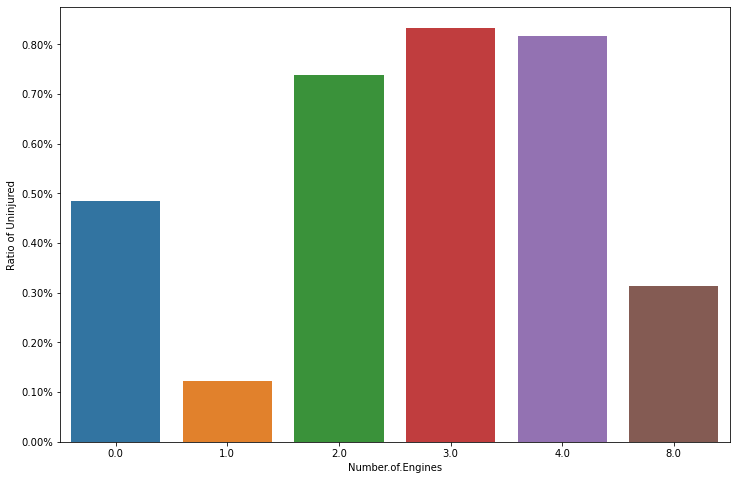

In [86]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=aviation_severe_engine_counts.index, y=aviation_severe_engine_counts['Ratio of Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

# 6B. Aviation Severe - ENGINE TYPE - Ratio of Uninjured to All Passengers

In [87]:
aviation_severe_engine_types = recent_aviation_severe.groupby(['Engine.Type']).mean()

In [88]:
aviation_severe_engine_types['Total Passengers'] = aviation_severe_engine_types['Total.Fatal.Injuries'] + aviation_severe_engine_types['Total.Serious.Injuries'] + aviation_severe_engine_types['Total.Minor.Injuries'] + aviation_severe_engine_types['Total.Uninjured']

In [89]:
aviation_severe_engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total Passengers
Engine.Type,,,,,,,
Electric,1.750000,0.400000,0.200000,0.000000,1.000000,2017.600000,1.600000
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000,2014.000000,2.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000,2020.000000,17.500000
None,0.555556,0.090909,1.090909,0.181818,3.909091,2017.000000,5.272727
Reciprocating,1.095238,1.046791,0.780719,0.260123,0.227857,2009.684087,2.315489
Turbo Fan,2.043333,7.506667,3.890845,2.741071,82.136201,2008.540373,96.274784
Turbo Jet,1.769912,1.988506,1.623529,0.637681,36.890244,2007.289474,41.139960
Turbo Prop,1.396731,1.971429,0.638577,0.433735,1.764133,2009.697055,4.807873
Turbo Shaft,1.164029,1.362319,0.940129,0.442623,0.453358,2009.614344,3.198429


In [90]:
aviation_severe_engine_types['Ratio of Uninjured'] = aviation_severe_engine_types['Total.Uninjured'] / aviation_severe_engine_types['Total Passengers'] 

In [91]:
aviation_severe_engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total Passengers,Ratio of Uninjured
Engine.Type,,,,,,,,
Electric,1.750000,0.400000,0.200000,0.000000,1.000000,2017.600000,1.600000,0.625000
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000,2014.000000,2.000000,0.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000,2020.000000,17.500000,0.314286
None,0.555556,0.090909,1.090909,0.181818,3.909091,2017.000000,5.272727,0.741379
Reciprocating,1.095238,1.046791,0.780719,0.260123,0.227857,2009.684087,2.315489,0.098406
Turbo Fan,2.043333,7.506667,3.890845,2.741071,82.136201,2008.540373,96.274784,0.853143
Turbo Jet,1.769912,1.988506,1.623529,0.637681,36.890244,2007.289474,41.139960,0.896701
Turbo Prop,1.396731,1.971429,0.638577,0.433735,1.764133,2009.697055,4.807873,0.366926
Turbo Shaft,1.164029,1.362319,0.940129,0.442623,0.453358,2009.614344,3.198429,0.141744


<ipython-input-92-18d6f635fd0a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


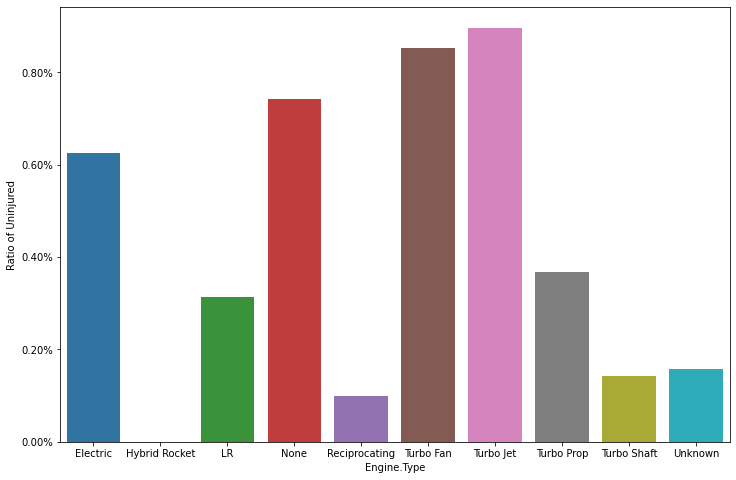

In [92]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=aviation_severe_engine_types.index, y=aviation_severe_engine_types['Ratio of Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

# 6C. Exploring Engine Counts for Turbo Fan and Turbo Jet Planes

Performed by: Kendall

In [93]:
turbo_jets = aviation.loc[aviation['Engine.Type'] == 'Turbo Jet']

In [94]:
turbo_jets['Number.of.Engines'].value_counts()

2.0    432
1.0     99
3.0     97
4.0     48
Name: Number.of.Engines, dtype: int64

In [95]:
turbo_fan = aviation.loc[aviation['Engine.Type'] == 'Turbo Fan']

In [96]:
turbo_fan['Number.of.Engines'].value_counts()

2.0    1693
3.0     330
4.0     235
1.0      28
Name: Number.of.Engines, dtype: int64

In [97]:
turbo_jets['Purpose.of.flight'].value_counts()

Unknown                      293
Personal                      85
Business                      43
Positioning                   43
Executive/corporate           31
Ferry                         13
Instructional                 10
Flight Test                   10
Public Aircraft                8
Public Aircraft - Federal      6
Other Work Use                 5
Air Race show                  5
Aerial Observation             2
Air Race/show                  2
Firefighting                   1
Aerial Application             1
Name: Purpose.of.flight, dtype: int64

In [98]:
turbo_fan['Purpose.of.flight'].value_counts()

Unknown                      908
Executive/corporate          115
Personal                      95
Positioning                   94
Business                      92
Instructional                 19
Flight Test                   14
Public Aircraft               14
Ferry                         12
Other Work Use                 8
Public Aircraft - Federal      4
Air Race show                  3
Aerial Application             2
Air Race/show                  2
Name: Purpose.of.flight, dtype: int64

# 6D. Creating Separate 1-2 Engines and Greater than 3 Engines DataFrames

Performed by: Kendall and Andrew

In [99]:
one_and_two_engines = aviation.loc[(aviation['Number.of.Engines'] < 3) & (aviation['Number.of.Engines'] > 0)]

In [100]:
greater_than_three_engines = aviation.loc[aviation['Number.of.Engines'] >= 3]

In [101]:
one_and_two_engines.shape

(79847, 32)

In [102]:
greater_than_three_engines.shape

(867, 32)

In [103]:
aviation['Make'].value_counts()[0:50]

Cessna                            26839
Piper                             14744
Beech                              5332
Bell                               2706
Boeing                             2652
Mooney                             1322
Robinson                           1223
Grumman                            1158
Bellanca                           1033
Hughes                              931
Schweizer                           772
Air Tractor                         684
Aeronca                             628
Maule                               587
Mcdonnell Douglas                   581
Champion                            517
Stinson                             433
Aero Commander                      425
Luscombe                            411
De Havilland                        410
Aerospatiale                        380
Taylorcraft                         378
North American                      373
Rockwell                            352
Hiller                              348


In [104]:
greater_than_three_engines.groupby('Make').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Make,,,,,,
Airbus,4.000000,0.000000,0.000000,0.000000,386.000000,2009.000000
Airbus Industrie,4.000000,0.000000,3.000000,22.500000,196.000000,2000.250000
Antonov,4.000000,0.000000,0.000000,2.000000,4.000000,2012.000000
Bae,4.000000,1.500000,0.000000,0.000000,24.250000,2013.500000
Bae Systems (Operations) Limit,4.000000,0.000000,0.000000,0.000000,1.000000,2013.000000
Bell,4.000000,0.000000,0.000000,0.000000,0.000000,2021.000000
Boeing,3.468410,3.651961,0.747596,1.683824,117.423503,1993.551198
British Aerospace,4.000000,2.150000,0.100000,0.190476,54.181818,1993.863636
British Aerospace Civil Aircr,4.000000,0.000000,0.000000,0.000000,0.000000,2015.000000


In [105]:
greater_than_three_engines['Make'].value_counts()

Boeing                            459
Mcdonnell Douglas                 140
Douglas                            88
Lockheed                           75
British Aerospace                  22
De Havilland                       11
Dassault                            8
Dassault-Breguet                    8
Dassault Aviation                   5
Airbus Industrie                    4
Bae                                 4
Airbus                              3
Mcdonnell-Douglas                   3
Canadair                            3
Vickers                             2
Dji                                 2
Cameron                             2
Britten-Norman                      2
Cessna                              2
Kubicek                             2
Bushmaster Aircraft                 1
Consolidated-Vultee                 1
Ilyushin                            1
Bae Systems (Operations) Limit      1
Lindstrand                          1
Kitty Hawk                          1
Piper       

In [106]:
greater_than_three_engines['Purpose.of.flight'].value_counts()

Unknown                      569
Business                      17
Positioning                   17
Personal                      13
Ferry                         11
Executive/corporate           10
Public Aircraft                9
Other Work Use                 6
Flight Test                    5
Instructional                  3
Aerial Application             3
Public Aircraft - Federal      2
Firefighting                   2
Aerial Observation             1
Name: Purpose.of.flight, dtype: int64

In [107]:
greater_than_three_engines['Engine.Type'].value_counts()

Turbo Fan        565
Turbo Jet        145
Reciprocating     60
Turbo Prop        36
Unknown            8
Electric           4
LR                 2
None               1
Name: Engine.Type, dtype: int64

In [108]:
greater_than_three_engines['Make'].value_counts()

Boeing                            459
Mcdonnell Douglas                 140
Douglas                            88
Lockheed                           75
British Aerospace                  22
De Havilland                       11
Dassault                            8
Dassault-Breguet                    8
Dassault Aviation                   5
Airbus Industrie                    4
Bae                                 4
Airbus                              3
Mcdonnell-Douglas                   3
Canadair                            3
Vickers                             2
Dji                                 2
Cameron                             2
Britten-Norman                      2
Cessna                              2
Kubicek                             2
Bushmaster Aircraft                 1
Consolidated-Vultee                 1
Ilyushin                            1
Bae Systems (Operations) Limit      1
Lindstrand                          1
Kitty Hawk                          1
Piper       

In [109]:
recent_aviation_severe['Make'].value_counts()[0:60]

Cessna                         3365
Piper                          2119
Beech                          1025
Bell                            544
Robinson                        384
Boeing                          304
Mooney                          243
Air Tractor                     140
Hughes                          121
Cirrus Design Corp              107
Schweizer                       107
Bellanca                        102
Robinson Helicopter              94
Grumman                          89
Eurocopter                       81
Air Tractor Inc                  80
Aeronca                          79
Robinson Helicopter Company      79
North American                   78
Cirrus                           77
Vans                             75
Aero Commander                   70
Champion                         64
Sikorsky                         62
Maule                            60
Mcdonnell Douglas                60
De Havilland                     59
Aerospatiale                

In [110]:
recent_aviation = aviation.loc[aviation['Year'] >= 2000]

In [111]:
recent_aviation['Make'].value_counts()[0:60]

Cessna                            10527
Piper                              5887
Beech                              2249
Boeing                             1703
Bell                               1215
Robinson                            805
Mooney                              578
Air Tractor                         359
Hughes                              348
Schweizer                           336
Bellanca                            334
Maule                               293
Airbus                              288
Aeronca                             270
Mcdonnell Douglas                   232
Robinson Helicopter                 230
Grumman                             229
Cirrus Design Corp                  223
Air Tractor Inc                     219
Champion                            200
Eurocopter                          196
Embraer                             194
Robinson Helicopter Company         194
Luscombe                            192
Stinson                             184


In [112]:
recent_aviation.groupby('Make').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Make,,,,,,
107.5 Flying Corporation,1.0,1.0,0.0,0.0,0.0,2006
1200,0.0,0.0,1.0,0.0,0.0,2005
177Mf Llc,1.0,0.0,2.0,0.0,0.0,2014
1977 Colfer-Chan,0.0,0.0,0.0,1.0,0.0,2001
2000 Mccoy,1.0,1.0,0.0,0.0,0.0,2000
...,...,...,...,...,...,...
Zorn,1.0,1.0,0.0,0.0,0.0,2004
Zs Delta-Bielsko Wroclaw,0.0,0.0,1.0,0.0,0.0,2018
Zubair S Khan,1.0,1.0,0.0,0.0,0.0,2014


# 7A. MAKE - Creating a Top Makes DataFrame that Includes Makes with Value Counts over 500 in the Entire Dataset

Performed by: Kendall and Andrew

In [113]:
make = aviation.groupby('Make').sum()

In [114]:
make['Total Passengers'] = make['Total.Fatal.Injuries'] + make['Total.Serious.Injuries'] + make['Total.Minor.Injuries'] + make['Total.Uninjured']

In [115]:
make['Ratio of Uninjured'] = make['Total.Uninjured'] / make['Total Passengers'] 

In [116]:
top_makes = make.loc[(make.index =='Cessna') | (make.index == 'Piper') | (make.index == 'Beech') | (make.index == 'Boeing') | (make.index == 'Bell') | (make.index == 'Piper') | (make.index == 'Robinson')| (make.index == 'Mooney')| (make.index == 'Air Tractor')| (make.index == 'Hughes')| (make.index == 'Schweizer')| (make.index == 'Bellanca')| (make.index == 'Maule')| (make.index == 'Airbus')| (make.index == 'Aeronca')| (make.index == 'Mcdonnell Douglas')| (make.index == 'Robinson Helicopter')| (make.index == 'Grumman')| (make.index == 'Cirrus Design Corp')| (make.index == 'Air Tractor Inc')| (make.index == 'Champion')]

In [123]:
top_makes

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total Passengers,Ratio of Uninjured
Make,,,,,,,,
Aeronca,624.0,117.0,155.0,162.0,552.0,1255006,986.0,55.983773
Air Tractor,642.0,116.0,75.0,110.0,399.0,1368818,700.0,57.000000
Air Tractor Inc,205.0,40.0,35.0,20.0,130.0,441233,225.0,57.777778
Airbus,358.0,1325.0,192.0,106.0,20478.0,580556,22101.0,92.656441
Beech,7014.0,3702.0,1093.0,1333.0,7654.0,10653503,13782.0,55.536207
Bell,2522.0,1312.0,868.0,1093.0,3040.0,5408424,6313.0,48.154602
Bellanca,1015.0,342.0,196.0,233.0,898.0,2061326,1669.0,53.804673
Boeing,3654.0,8114.0,2126.0,2706.0,196706.0,5315694,209652.0,93.825005
Cessna,28126.0,9342.0,4850.0,6799.0,32987.0,53607814,53978.0,61.111934


# 7B. MAKE - Ratio of Uninjured to All Passengers

Performed by: Kendall 

In [124]:
top_makes['Ratio of Uninjured'] = top_makes['Ratio of Uninjured'] * 100

<ipython-input-124-b24f5aa5ae2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_makes['Ratio of Uninjured'] = top_makes['Ratio of Uninjured'] * 100


<ipython-input-125-ba591d0991c7>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


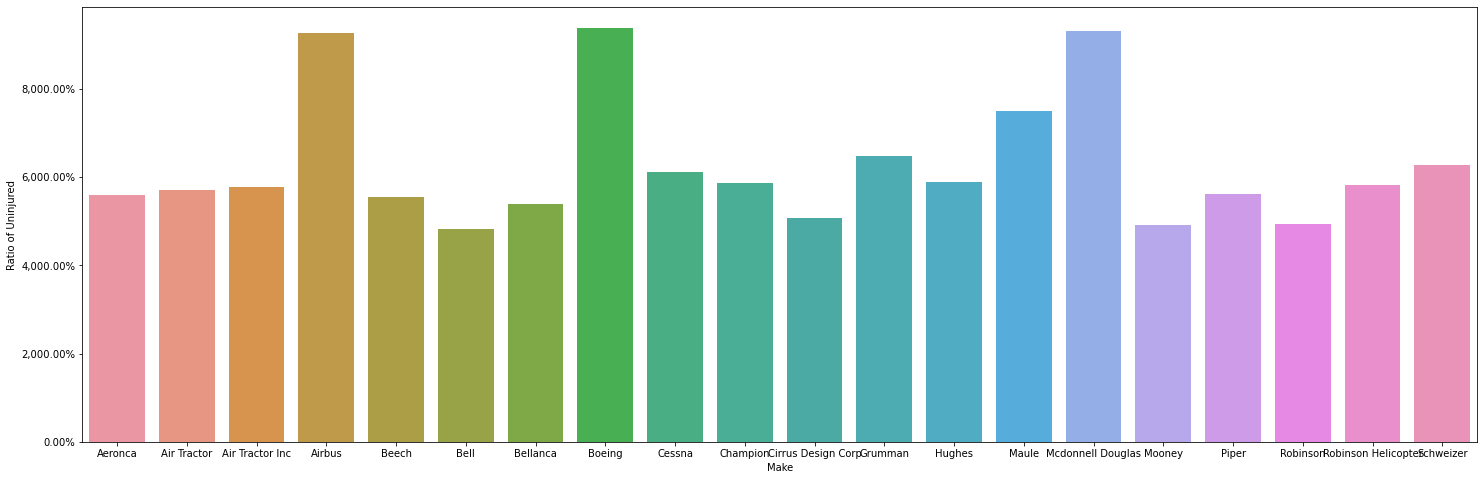

In [125]:
fig, ax = plt.subplots(figsize=(25,8))

sns.barplot(x=top_makes.index, y=top_makes['Ratio of Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);